# Лабораторна робота №1

**Тема:** Постановка задачі та побудова аналітичної бази даних

**Мета:** Проаналізувати потреби клієнта, сформулювати бізнес — та аналітичні цілі, виконати первинне дослідження даних, створити реляційну базу даних та підключити її до інструменту візуалізації для пошуку інсайтів.

---

**Опис компанії-замовника:** HealthGuard Insurance — страхова компанія, яка пропонує поліси добровільного медичного страхування з динамічними тарифами залежно від способу життя застрахованих осіб.

**Запит:** Компанія прагне точніше сегментувати клієнтів за ризиками, пов’язаними з ожирінням, для персоналізації страхових тарифів і зменшення витрат на покриття хронічних захворювань.

**Пропозиція реалізації:** Розробити модель прогнозування ймовірності ожиріння на основі даних анкет клієнтів. Модель дозволить адаптувати тарифи страхування та формувати індивідуальні профілактичні пропозиції.

## 1. Можливі бізнес-цілі

---

**Бізнес-ціль 1:** Оптимізація тарифів на основі індивідуальних ризиків

**Ціль моделювання:** Розробити модель, яка прогнозує ймовірність розвитку ожиріння у клієнта на основі анкетних даних (вік, стать, спосіб життя, харчові звички, рівень фізичної активності тощо).

**Критерії успіху:**
- Точність моделі (AUC-ROC ≥ 0.85) у прогнозуванні ожиріння.
- Зменшення середньої вартості полісів для низькоризикових клієнтів на 10–15% без збільшення збитковості портфеля.
- Підвищення задоволеності клієнтів (NPS ≥ 40) завдяки персоналізованим тарифам.

---

**Бізнес-ціль 2:** Зменшення витрат на лікування хронічних захворювань

**Ціль моделювання:** Виявити клієнтів з високим ризиком ожиріння та пов’язаними захворюваннями (діабет, серцево-судинні проблеми) для проактивного втручання.

**Критерії успіху:**
- Зниження кількості виплат за хронічними захворюваннями на 20% протягом року після впровадження моделі.
- Збільшення участі клієнтів у профілактичних програмах (наприклад, знижки на фітнес-клуби, консультації дієтолога) на 30%.
- Економія коштів на 1 клієнта з високим ризиком — не менше 15% порівняно з попереднім роком.

---

**Бізнес-ціль 3:** Підвищення лояльності клієнтів через персоналізацію

**Ціль моделювання:** Сегментувати клієнтів за рівнем ризику ожиріння та пропонувати їм індивідуальні бонуси (наприклад, знижки на страхування при досягненні цілей здоров’я).

**Критерії успіху:**
- Збільшення відсотка продовження полісів на 25% серед клієнтів, які отримали персоналізовані пропозиції.
- Підвищення середнього часу утримання клієнта (customer lifetime) на 12 місяців.
- Зростання продажів додаткових послуг (наприклад, страхування від критичних хвороб) на 10% завдяки крос-селу.

## 2. Додаткова ціль

**Бізнес-ціль 4:** Точніша сегментація клієнтів за ризиками ожиріння для адаптації тарифів

**Ціль моделювання:** Розробити модель машинного навчання, яка на основі анкетних даних (включно з поведінковими факторами, такими як частота вживання фастфуду, рівень стресу, спадковість) класифікує клієнтів за ступенем ризику ожиріння (низький/середній/високий).

**Критерії успіху:** Модель повинна правильно класифікувати `≥80%` клієнтів (за валідацією на тестовій вибірці).

## 3. Аналіз даних

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./ObesityDataSet_raw_and_data_sinthetic.csv")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
print("Columns present: ", list(data.columns))

Columns present:  ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']


In [5]:
print("Num. of samples:", data.shape[0])
print("Any data missing (True/False): ", data.isnull().values.any())

Num. of samples: 2111
Any data missing (True/False):  False


In [6]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Огляд показує велику вибірку даних, охоплюючи широкий спектр можливих категорій (вік, стать, вага, спосіб життя тощо), що сприятиме подальшому аналізу під час формування та тренування моделі для досягнення згаданих у пунктах 1-2 бізнес-цілей. Кожна комірка даних містить у собі певну інформацію, однак це не звільняє від необхідності оглянути дані на предмет аномалій та нелогічних показників. Загалом, на даному етапу отримані дані можна вважати валідними для опрацювання. 

## 4. Створення БД

In [7]:
import sqlite3

start_date = pd.to_datetime('2025-01-01')
end_date = pd.to_datetime('2025-12-31')

n = len(data)
random_dates = pd.to_datetime(
    np.random.randint(start_date.value // 10**9, end_date.value // 10**9, n), unit='s'
)
data['timestamp'] = random_dates

conn = sqlite3.connect('obesity.db')
data.to_sql("obesity_data", conn, if_exists='replace', index=False)
conn.close()

In [8]:
## Check data in DB
conn = sqlite3.connect('obesity.db')
df = pd.read_sql_query("SELECT * FROM obesity_data LIMIT 5;", conn)
print(df)

   Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes   no   2.0  3.0   
1  Female   21    1.52    56.0                            yes   no   3.0  3.0   
2    Male   23    1.80    77.0                            yes   no   2.0  3.0   
3    Male   27    1.80    87.0                             no   no   3.0  3.0   
4    Male   22    1.78    89.8                             no   no   2.0  1.0   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no   2.0   no  0.0  1.0          no  Public_Transportation   
1  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2  Sometimes    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3  Sometimes    no   2.0   no  2.0  0.0  Frequently                Walking   
4  Sometimes    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

            NObeyesdad            timestamp 

## 5. Візуалізація даних

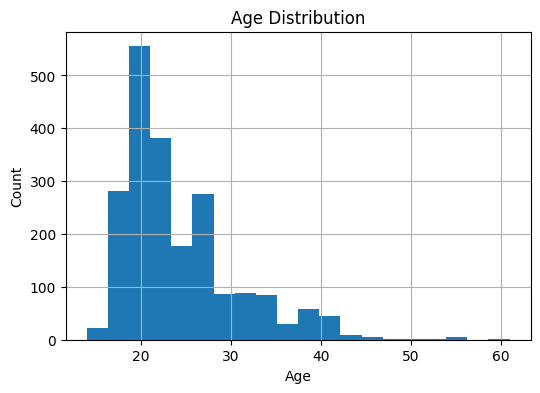

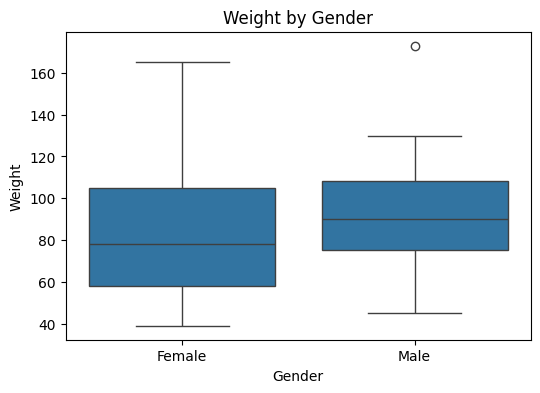

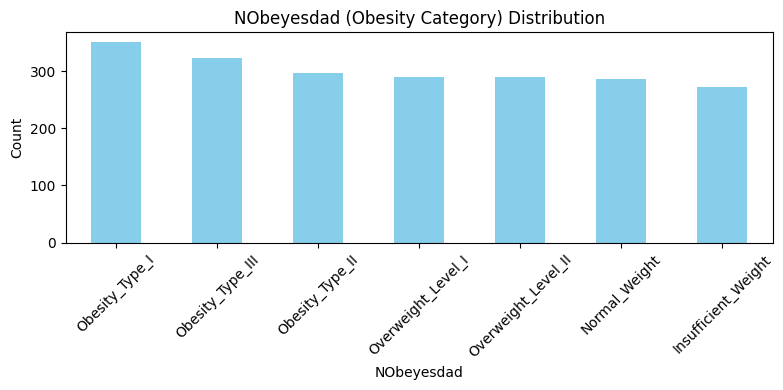

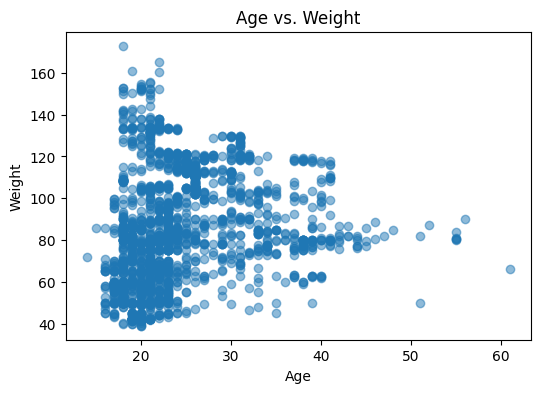

/tmp/ipykernel_14500/2451217419.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='Age', data=data, palette='Set2')


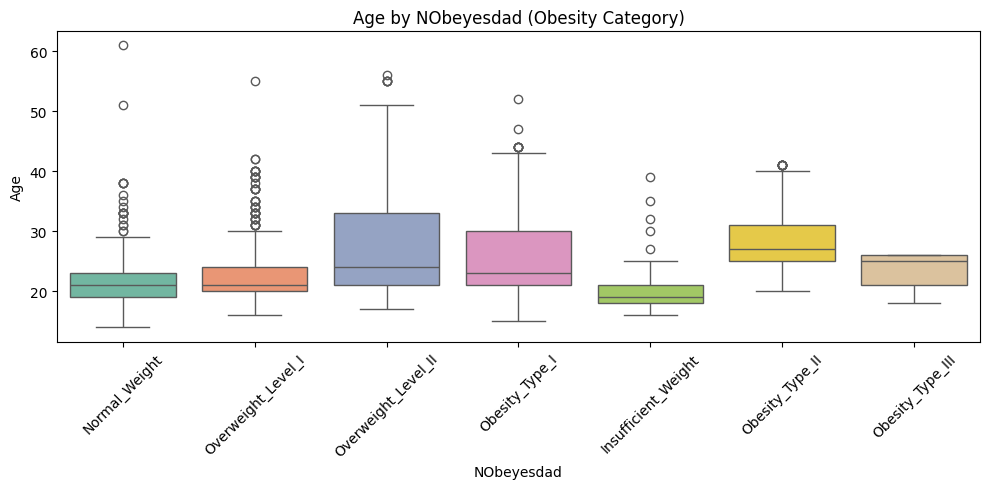

In [9]:
import seaborn as sns


# 1. Histogram of Age
plt.figure(figsize=(6,4))
data['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# 2. Boxplot of Weight by Gender
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Weight', data=data)
plt.title('Weight by Gender')
plt.show()


# 3. Bar plot of NObeyesdad counts (target variable)
plt.figure(figsize=(8,4))
data['NObeyesdad'].value_counts().plot(kind='bar', color='skyblue')
plt.title('NObeyesdad (Obesity Category) Distribution')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. Scatter plot: Age vs. Weight
plt.figure(figsize=(6,4))
plt.scatter(data['Age'], data['Weight'], alpha=0.5)
plt.title('Age vs. Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()


# 5. Boxplot of Age by NObeyesdad (target variable)
plt.figure(figsize=(10,5))
sns.boxplot(x='NObeyesdad', y='Age', data=data, palette='Set2')
plt.title('Age by NObeyesdad (Obesity Category)')
plt.xlabel('NObeyesdad')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Висновки за результатами візуалізації даних

- **Розподіл віку**: Більшість клієнтів знаходяться у певному віковому діапазоні, що може впливати на ризики ожиріння. Вікові групи з піками можуть бути цільовими для профілактичних програм.

- **Вага за статтю**: Розподіл ваги між чоловіками та жінками відрізняється, що свідчить про необхідність враховувати стать у моделюванні ризиків.

- **Категорії ожиріння (NObeyesdad)**: Дисбаланс між класами ожиріння — певні категорії представлені частіше. Це важливо враховувати при побудові моделі (наприклад, балансування класів).

- **Зв'язок віку та ваги**: Спостерігається певна залежність між віком і вагою, але вона не є лінійною. Можливі групи ризику серед молодших клієнтів (до 30 років).

- **Вік у різних категоріях ожиріння**: Вік суттєво відрізняється між категоріями ожиріння. Деякі категорії мають вищий або нижчий середній вік, що може бути корисним для таргетування профілактики.

Загалом, візуалізація підтвердила наявність важливих патернів у даних, які слід враховувати при побудові аналітичної моделі та формуванні бізнес-рішень.